<a href="https://colab.research.google.com/github/akfalah/03_AhmadKhoirulFalah/blob/main/Week7_tugas_kelompok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


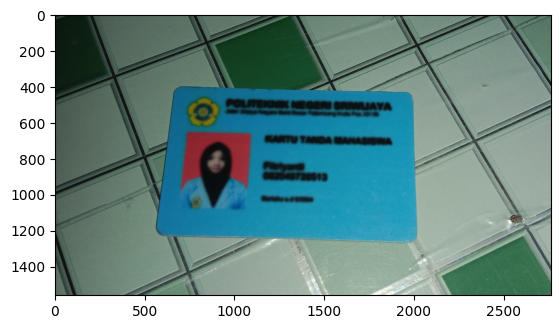

In [3]:
# @title load image

original_image = cv.imread('/content/drive/MyDrive/pcvk/4/3I_2341729016_3 - Fitri yanti.jpg')
original_image = cv.cvtColor(original_image, cv.COLOR_BGR2RGB)

plt.imshow(original_image)
plt.show()

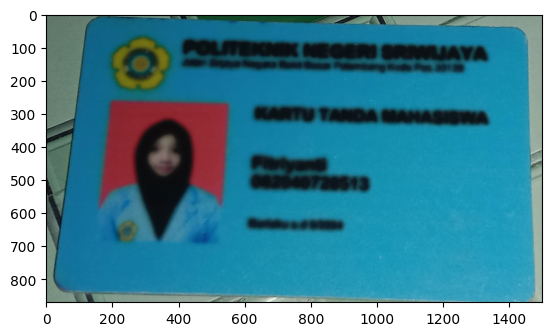

In [4]:
# @title crop image

crop_image = original_image[390:1260, 540:2040]

plt.imshow(crop_image)
plt.show()

In [5]:
# Fungsi untuk menyesuaikan kecerahan dan kontras gambar
def adjust_brightness_contrast(image, alpha, beta):
    bright_image = np.zeros_like(image)
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            for c in range(image.shape[2]):
                bright_image[y, x, c] = np.clip(alpha * image[y, x, c] + beta, 0, 255)
    return bright_image

# Fungsi untuk melakukan konvolusi pada gambar
def convolve_image(image, kernel):
    kernel_size = kernel.shape[0]  # Mendapatkan ukuran kernel
    padding_size = kernel_size // 2  # Menghitung ukuran padding

    convolved_image = np.zeros_like(image)  # Membuat gambar output kosong

    padded_image = np.pad(image, ((padding_size, padding_size), (padding_size, padding_size), (0, 0)), mode='edge')  # Melakukan padding pada gambar

    # Melakukan operasi konvolusi
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            for channel in range(image.shape[2]):
                pixel_value = 0
                for kernel_y in range(-padding_size, padding_size + 1):
                    for kernel_x in range(-padding_size, padding_size + 1):
                        pixel_value += (padded_image[y + kernel_y + padding_size, x + kernel_x + padding_size, channel] *
                                        kernel[kernel_y + padding_size, kernel_x + padding_size])
                convolved_image[y, x, channel] = np.clip(pixel_value, 0, 255)

    return convolved_image

# Fungsi untuk menerapkan average filter
def average_filter(image, kernel_size):
    kernel = np.ones((kernel_size, kernel_size)) / (kernel_size * kernel_size)

    return convolve_image(image, kernel)

# Fungsi untuk meningkatkan saturasi warna
def increase_saturation(image, factor):
    hsv = cv.cvtColor(image, cv.COLOR_RGB2HSV)  # Mengubah gambar ke ruang warna HSV
    hsv[:,:,1] = np.clip(hsv[:,:,1] * factor, 0, 255)  # Meningkatkan saturasi

    return cv.cvtColor(hsv, cv.COLOR_HSV2RGB)  # Mengembalikan gambar ke ruang warna RGB

In [7]:
# Menerapkan penyesuaian kecerahan dan kontras
bright_image = adjust_brightness_contrast(crop_image, 2, 0.1)

# # Mendefinisikan kernel penajaman
# sharpening_kernel = np.array([
#     [0, -1, 0],
#     [-1, 5, -1],
#     [0, -1, 0]
# ])

# # Menerapkan penajaman pertama
# sharpened_image = convolve_image(bright_image, sharpening_kernel)

# Mendefinisikan kernel penajaman kedua
sharpening_kernel2 = np.array([
    [-1, -1, -1],
    [-1, 9, -1],
    [-1, -1, -1]
])

# Menerapkan penajaman kedua
sharpened_image = convolve_image(bright_image, sharpening_kernel2)

# Menerapkan pengurangan noise
denoised_image = average_filter(sharpened_image, 3)

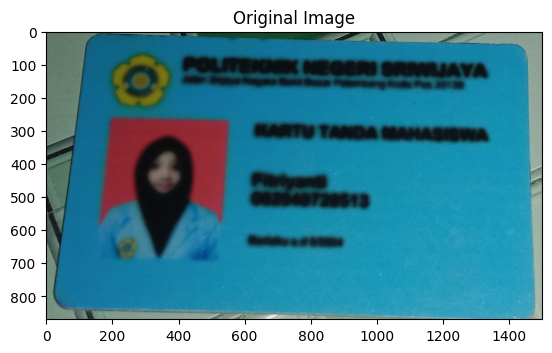

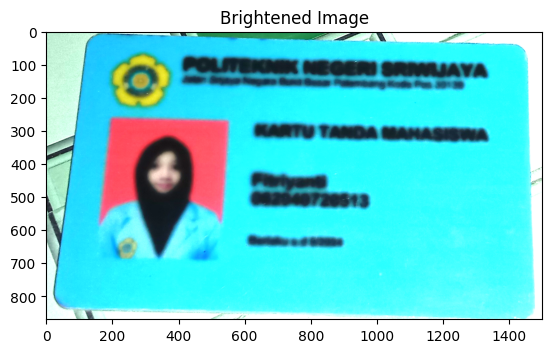

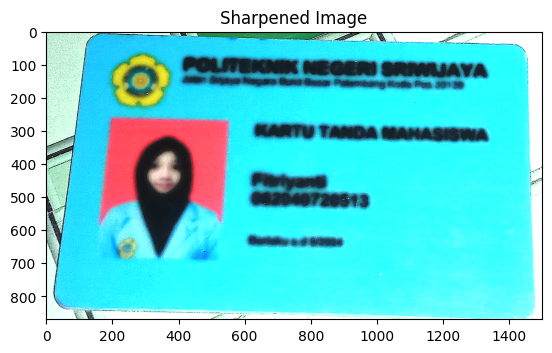

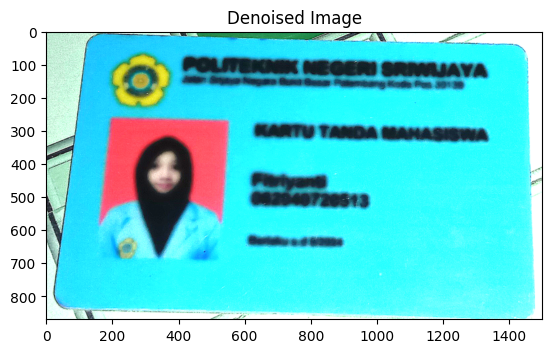

In [8]:
# Menampilkan hasil-hasil pengolahan
plt.title('Original Image')
plt.imshow(crop_image)
plt.show()

plt.title('Brightened Image')
plt.imshow(bright_image)
plt.show()

plt.title('Sharpened Image')
plt.imshow(sharpened_image)
plt.show()

plt.title('Denoised Image')
plt.imshow(denoised_image)
plt.show()